In [55]:
import pandas as pd 
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\16 Neural Networks\forestfires.csv")

In [4]:
df=data.copy()

In [5]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
df.drop(["month","day"],axis=1,inplace=True)

In [7]:
df["size_category"].value_counts()

size_category
small    378
large    139
Name: count, dtype: int64

In [8]:
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

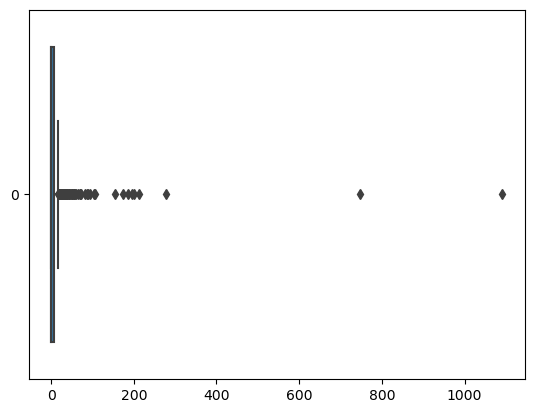

In [11]:
ax=sns.boxplot(df["area"],orient="h")

Skewness :  12.846933533934868
Kurtosis :  194.1407210942299


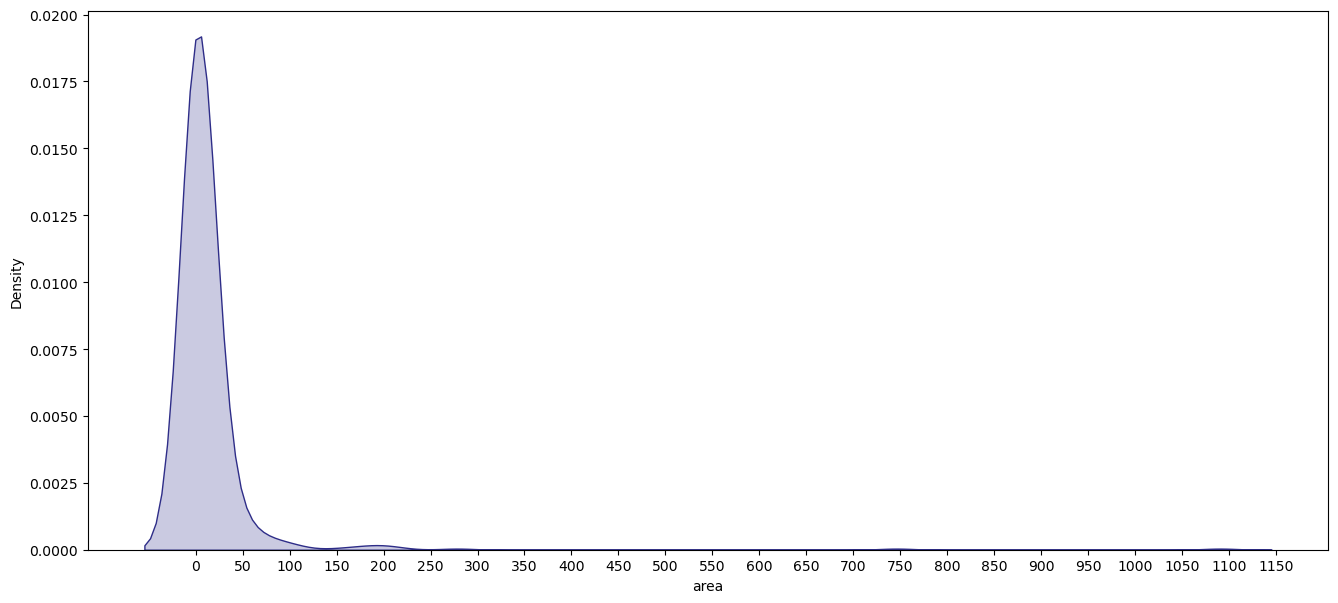

In [12]:
print("Skewness : ",df["area"].skew())
print("Kurtosis : ",df["area"].kurt())
plt.figure(figsize=(16,7))
ax=sns.kdeplot(df["area"],fill=True,color="#2E2D88")
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [14]:
dfa = df[df.columns[0:10]]
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

In [16]:
num_columns

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri']

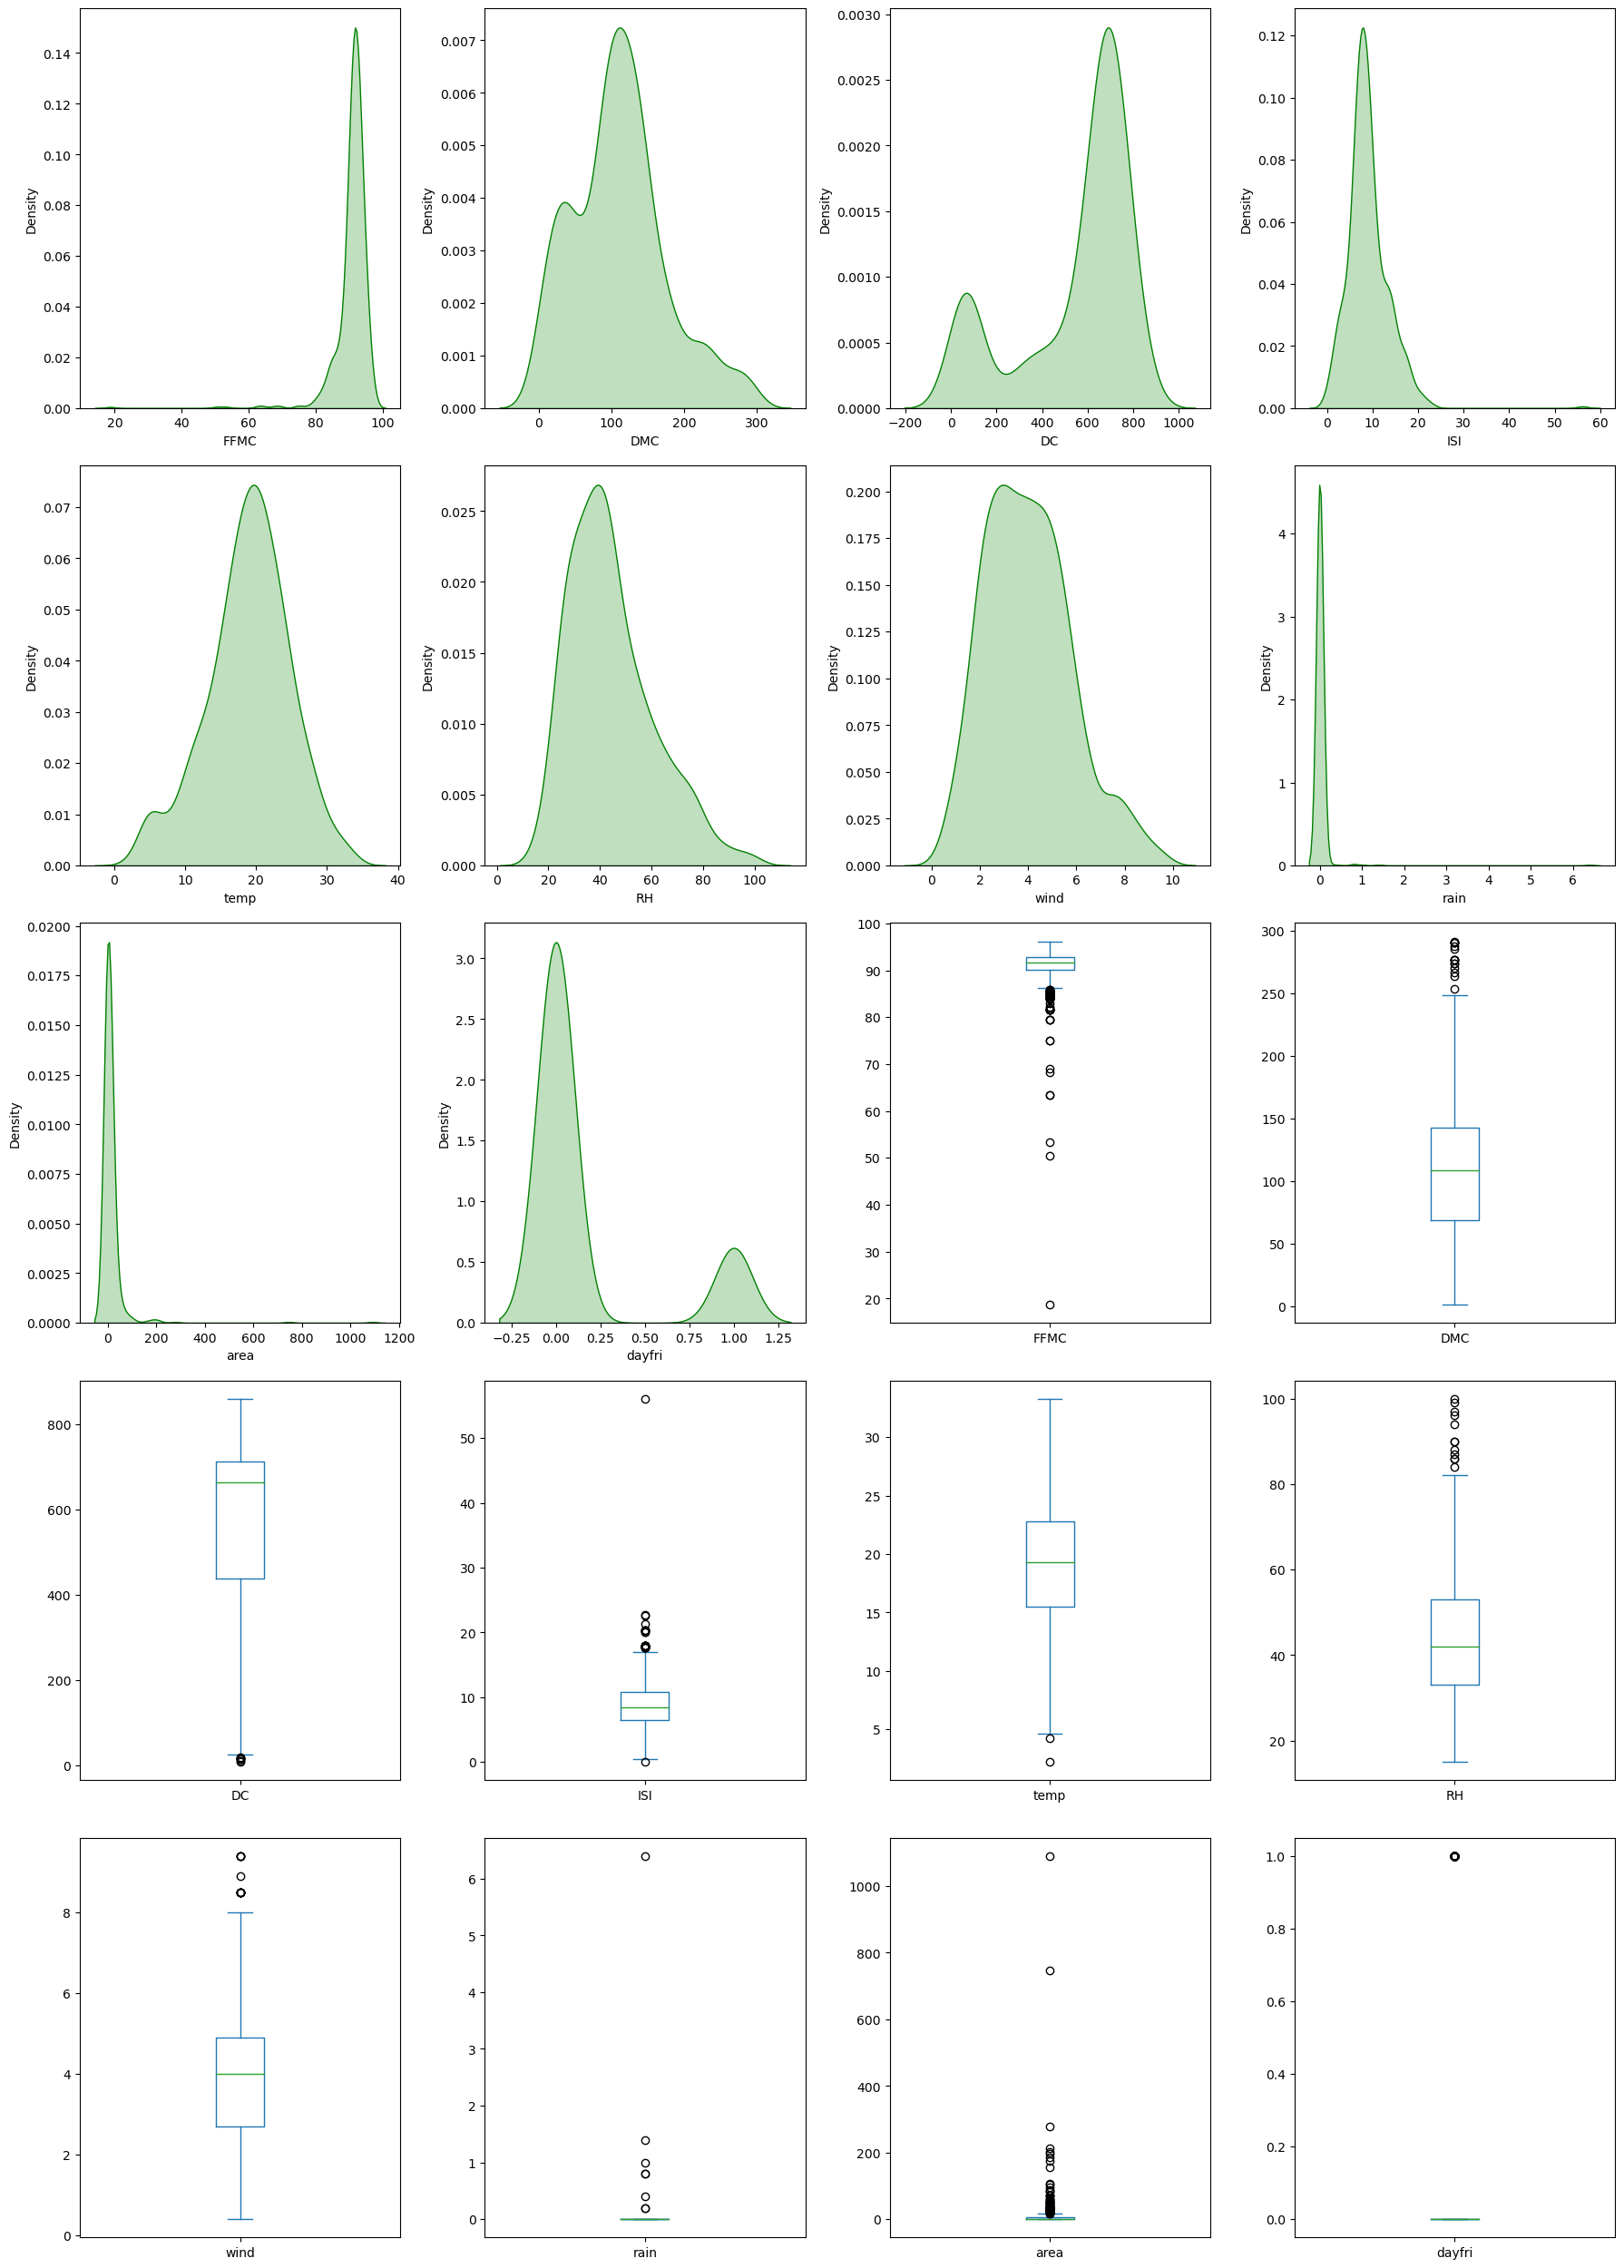

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265


In [15]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',fill=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [44]:
corr=dfa.corr()

<Axes: >

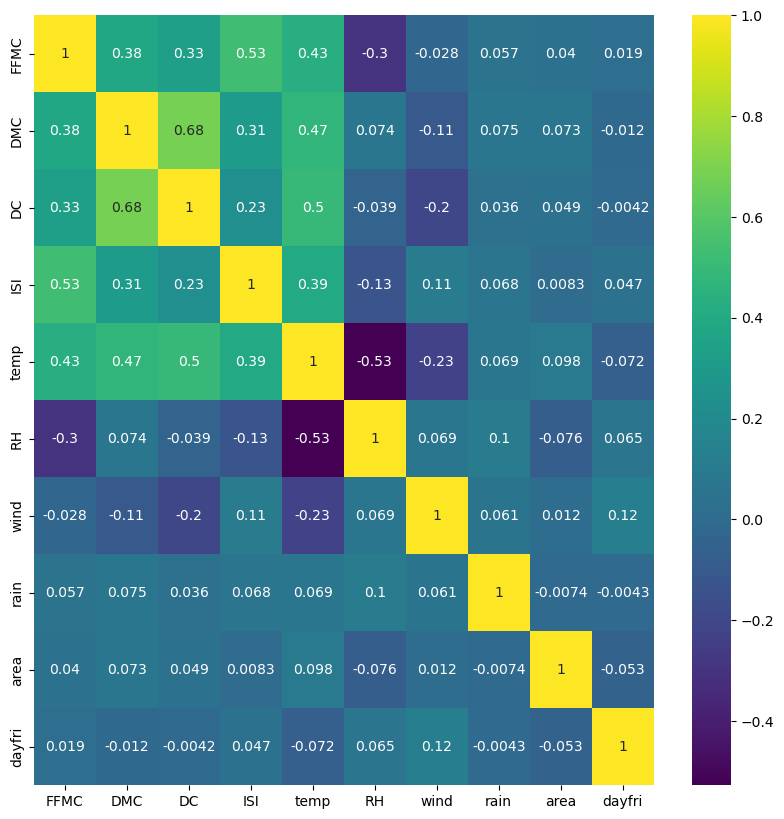

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="viridis")

## Neural Neteork Model

In [51]:
mapping = {'small': 1, 'large': 2}

In [52]:
df = df.replace(mapping)

In [64]:
X = np.array(df.iloc[:,0:28])
Y = np.array(df.iloc[:,28])

In [60]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [62]:
X_norm = norm_func(X)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test= train_test_split(X_norm,y, test_size=0.2,stratify = y)

In [69]:
!pip install keras
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tesnorflow (from versions: none)
ERROR: No matching distribution found for tesnorflow


In [73]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [74]:
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150


42/42 [==============================] - 1s 2ms/step - loss: 0.5802 - accuracy: 0.5593
Epoch 2/150
42/42 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.7312
Epoch 3/150
42/42 [==============================] - 0s 1ms/step - loss: -0.2836 - accuracy: 0.7312
Epoch 4/150
42/42 [==============================] - 0s 1ms/step - loss: -0.6769 - accuracy: 0.7312
Epoch 5/150
42/42 [==============================] - 0s 1ms/step - loss: -1.0941 - accuracy: 0.7312
Epoch 6/150
42/42 [==============================] - 0s 1ms/step - loss: -1.5923 - accuracy: 0.7312
Epoch 7/150
42/42 [==============================] - 0s 1ms/step - loss: -2.2405 - accuracy: 0.7312
Epoch 8/150
42/42 [==============================] - 0s 1ms/step - loss: -3.0779 - accuracy: 0.7312
Epoch 9/150
42/42 [==============================] - 0s 1ms/step - loss: -4.1524 - accuracy: 0.7312
Epoch 10/150
42/42 [==============================] - 0s 1ms/step - loss: -5.4993 - accuracy: 0.7312

In [77]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: -9091.6699 - accuracy: 0.7312
Accuracy: 73.12


In [80]:
predictions = model.predict(x_train)
#predictions = (model.predict(x_test) > 0.5).astype("int32")

13/13 [==============================] - 0s 1ms/step


In [81]:
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[86.2, 26.2, 94.3, 5.1, 8.2, 51.0, 6.7, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[90.6, 35.4, 669.1, 6.7, 18.0, 33.0, 0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[90.6, 43.7, 686.9, 6.7, 14.6, 33.0, 1.3, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] => 1 (expected 1)
[91.7, 33.3, 77.5, 9.0, 8.3, 97.0, 4.0, 0.2, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
[89.3, 51.3, 102.2, 9.6, 11.4, 99.0, 1.8, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] => 1 (expected 1)
